# Data Modeling


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

import time
from pandas import option_context
from itertools import combinations


import warnings
warnings.simplefilter(action='ignore', category=Warning)

pal = ['#00246d', '#2492b6', '#93c9db', '#93c9db', '#2492b6', '#00246d']
sns.set_palette(palette='icefire')

scoring = 'recall'

In [2]:
df = pd.read_csv('datasets/readmission_cleaned.csv')

In [3]:
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9
0,0,1,1,41,0,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,0,2,3,59,0,18,0,0,0,7,...,0,0,0,0,0,0,0,1,0,0
2,0,3,2,11,5,13,2,0,1,7,...,0,0,0,0,0,0,0,1,0,0
3,1,4,2,44,1,16,0,0,0,7,...,0,0,0,0,0,0,0,1,0,0
4,1,5,1,51,0,8,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


___

In [4]:
def uniqueValueDataFrame(df):
    col_name = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    for col in df.columns:
        col_name.append(col)
        unique_value_list.append(df[col].unique())
        total_unique_value.append(len(df[col].unique()))
        data_type.append(df[col].dtype)
    
    data = pd.DataFrame({"col":col_name, "unique values":unique_value_list, "unique count":total_unique_value, "data type":data_type})
    
    data = data.set_index("col")
    return data.sort_values("unique count",ascending=False)


unique_data = uniqueValueDataFrame(df)

In [5]:
with option_context('display.max_columns', 200):
    display(unique_data.T)

col,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,time_in_hospital,age,diag_2,diag_3,diag_1,num_procedures,max_glu_serum,A1Cresult,discharge_disposition_id_27,discharge_disposition_id_3,discharge_disposition_id_28,gender,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_16,discharge_disposition_id_23,discharge_disposition_id_22,discharge_disposition_id_2,discharge_disposition_id_18,discharge_disposition_id_17,discharge_disposition_id_8,discharge_disposition_id_15,discharge_disposition_id_7,admission_source_id_17,discharge_disposition_id_9,admission_source_id_1,admission_source_id_8,admission_source_id_7,admission_source_id_6,admission_source_id_5,admission_source_id_4,admission_source_id_3,admission_source_id_25,admission_source_id_22,admission_source_id_20,admission_source_id_2,discharge_disposition_id_10,admission_source_id_14,admission_source_id_13,admission_source_id_11,admission_source_id_10,discharge_disposition_id_12,admission_type_id_2,discharge_disposition_id_1,glipizide-metformin,insulin,tolazamide,troglitazone,miglitol,acarbose,rosiglitazone,pioglitazone,tolbutamide,glyburide,glipizide,glimepiride,chlorpropamide,nateglinide,repaglinide,metformin,glyburide-metformin,glimepiride-pioglitazone,admission_type_id_8,metformin-rosiglitazone,admission_type_id_7,admission_type_id_6,admission_type_id_5,admission_type_id_4,admission_type_id_3,admission_type_id_1,race_Other,race_Hispanic,race_Caucasian,race_Asian,race_AfricanAmerican,readmitted,diabetesMed,medication_change,metformin-pioglitazone,admission_source_id_9
unique values,"[41, 59, 11, 44, 51, 31, 70, 73, 68, 33, 47, 6...","[1, 18, 13, 16, 8, 21, 12, 28, 17, 11, 15, 31,...","[0, 2, 1, 5, 7, 9, 3, 8, 4, 12, 11, 6, 20, 15,...","[0, 1, 2, 4, 3, 9, 5, 7, 6, 8, 22, 25, 10, 13,...","[0, 1, 2, 3, 6, 5, 4, 7, 9, 8, 15, 10, 11, 14,...","[1, 9, 6, 7, 5, 8, 3, 4, 2, 16, 12, 13, 15, 10...","[1, 3, 2, 4, 5, 13, 12, 9, 7, 10, 6, 11, 8, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[7, 4, 1, 0, 8, 5, 3, 6, 2]","[7, 0, 4, 8, 5, 1, 6, 3, 2]","[4, 7, 1, 0, 8, 5, 3, 2, 6]","[0, 5, 1, 6, 2, 3, 4]","[-99, 1, 0]","[-99, 1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]"
unique count,118,75,39,33,21,16,14,10,9,9,9,7,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
data type,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


___

### All Functions

In [6]:
def generate_auc_roc_curve(estimator, X, y):
    y_pred_proba = estimator.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y,  y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)
    plt.figure(figsize=(8,5), dpi=100)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()

In [7]:
def generate_model_report(y_actual, y_predicted):
    accuracy = accuracy_score(y_actual, y_predicted)
    precision = precision_score(y_actual, y_predicted)
    recall = recall_score(y_actual, y_predicted)
    f1 = f1_score(y_actual, y_predicted)
    
    return accuracy, precision, recall, f1

In [8]:
def report_and_matrix(estimator, X_train, X_test, y_train, y_test):
    y_hat_train = estimator.predict(X_train)
    y_hat_test = estimator.predict(X_test)
    
    # confusion matrix plot
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5), dpi=100) 
    plt.suptitle('Patients Readmitted Within 30 Days')
    
    plot_confusion_matrix(estimator, X_train , y_train, ax=ax1, normalize='all')
    ax1.title.set_text('TRAINING')
    ax1.set_xlabel('Predicted'); ax1.set_ylabel('Actual');
    #ax1.xaxis.set_ticklabels(['Yes', 'No']); ax1.yaxis.set_ticklabels(['No', 'Yes']);
    
    plot_confusion_matrix(estimator, X_test , y_test, ax=ax2, normalize='all')
    ax2.title.set_text('TEST')
    ax2.set_xlabel('Predicted'); ax2.set_ylabel('Actual');
    #ax2.xaxis.set_ticklabels(['Yes', 'No']); ax2.yaxis.set_ticklabels(['No', 'Yes']);
    
    
    accuracy_train, precision_train, recall_train, f1_train = generate_model_report(y_train, y_hat_train)
    accuracy_test, precision_test, recall_test, f1_test = generate_model_report(y_test, y_hat_test)
    data = {
        'TRAIN':[accuracy_train, precision_train, recall_train, f1_train],
        'TEST':[accuracy_test, precision_test, recall_test, f1_test]
    }
    df = pd.DataFrame(data, index =['ACCURACY', 'PERCISION', 'RECALL', 'F1'])
    display(df)

In [9]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,20), dpi=100)
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

___

### TEST TRAIN SPLIT

In [10]:
X = df.drop(columns='readmitted', axis=1)
y = df.readmitted

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

79472 19868 79472 19868


___

## Baseline Models with default hyperparameters

#### Logistic Regression

In [13]:
log_baseline = LogisticRegression(solver='liblinear', class_weight='balanced')
log_baseline.fit(X_train, y_train)

y_test_predicted = log_baseline.predict_proba(X_test)
y_train_predicted = log_baseline.predict_proba(X_train)

In [14]:
print(roc_auc_score(y_train, y_train_predicted[:,1]))

0.665153199272704


,TRAIN,TEST
ACCURACY,0.676679,0.679787
PERCISION,0.183191,0.191109
RECALL,0.536683,0.539689
F1,0.273146,0.282265


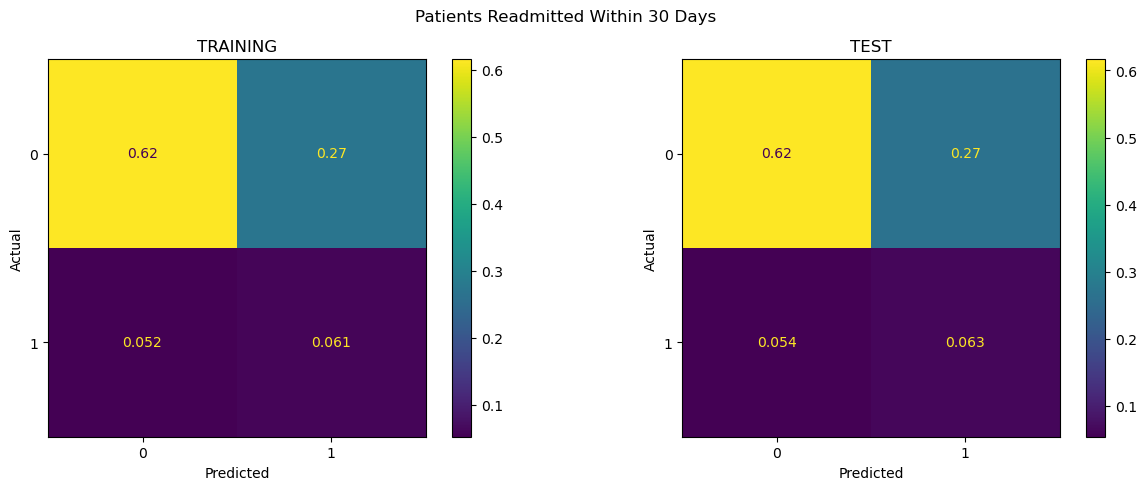

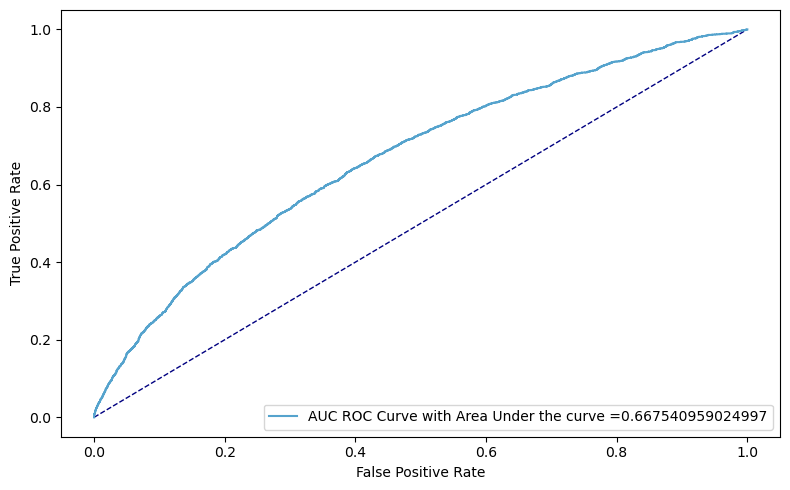

In [15]:
report_and_matrix(log_baseline, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(log_baseline,X_test, y_test)

#### KNN Classifier

In [16]:
knn_baseline = KNeighborsClassifier(n_jobs=-1, n_neighbors=10)
knn_baseline.fit(X_train, y_train)

#y_test_predicted = knn_baseline.predict(X_test)
#y_train_predicted = knn_baseline.predict(X_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

,TRAIN,TEST
ACCURACY,0.887306,0.883330
PERCISION,0.656250,0.500000
RECALL,0.009337,0.004745
F1,0.018413,0.009402


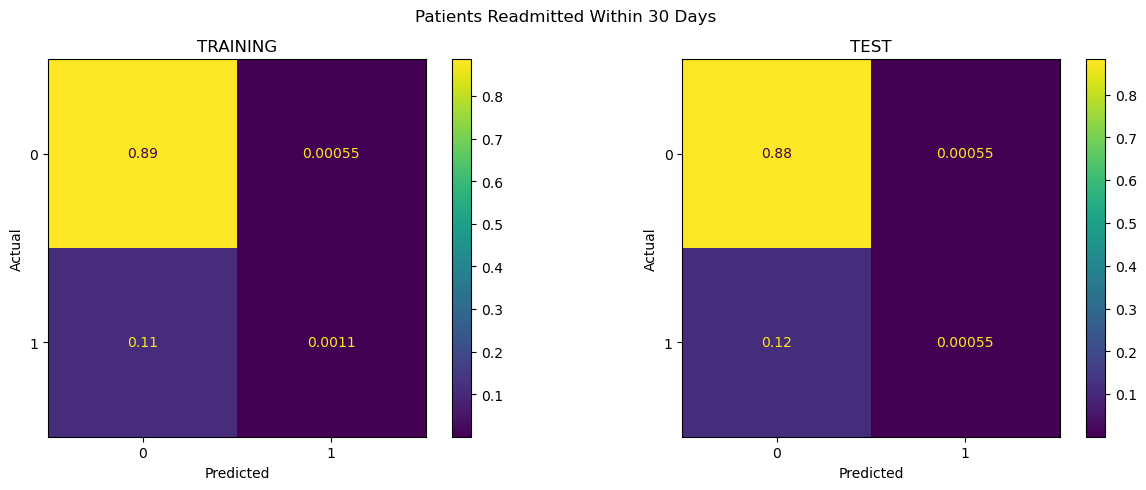

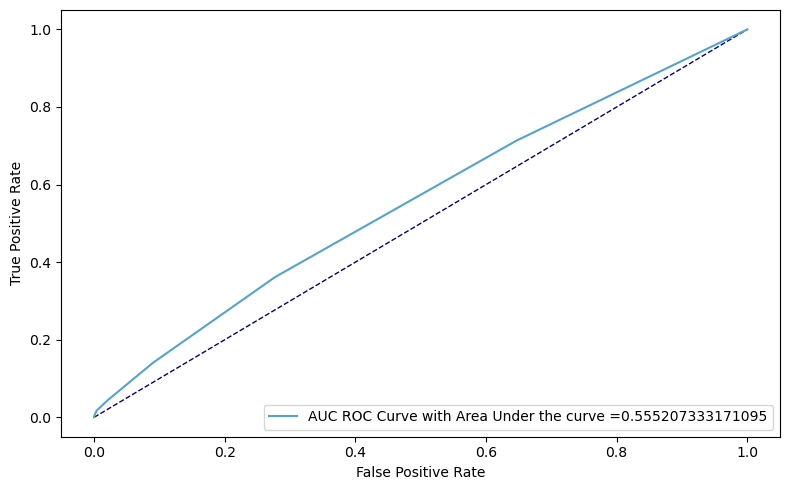

In [17]:
report_and_matrix(knn_baseline, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(knn_baseline,X_test, y_test)

#### Decision Tree Classifier

In [18]:
dtc_baseline = DecisionTreeClassifier(random_state=45, max_depth=10)
dtc_baseline.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=45)

,TRAIN,TEST
ACCURACY,0.894252,0.880713
PERCISION,0.787379,0.386957
RECALL,0.090151,0.038395
F1,0.161779,0.069859


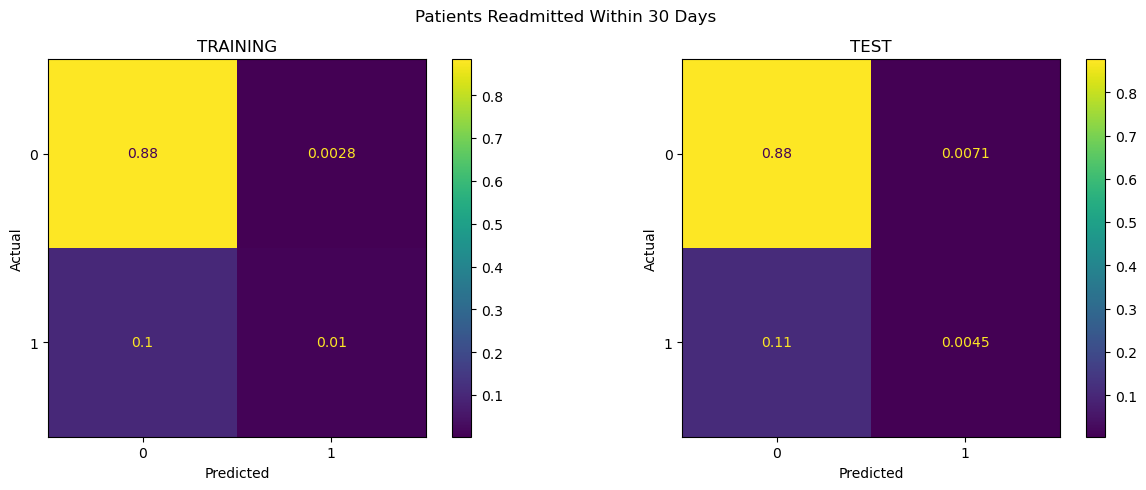

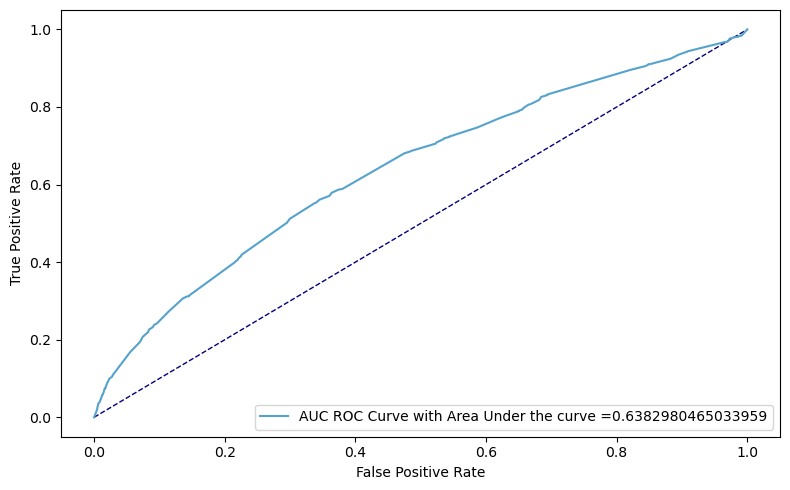

In [19]:
report_and_matrix(dtc_baseline, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(dtc_baseline,X_test, y_test)

#### Random Forest Classifier

In [20]:
forest_baseline = RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
forest_baseline.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1)

,TRAIN,TEST
ACCURACY,0.886904,0.88333
PERCISION,1.000000,0.00000
RECALL,0.000889,0.00000
F1,0.001777,0.00000


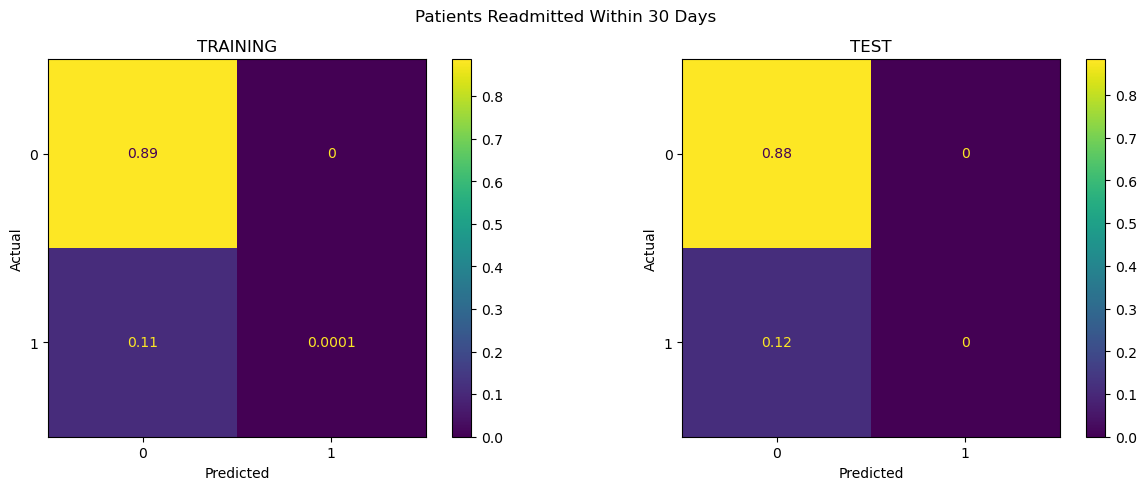

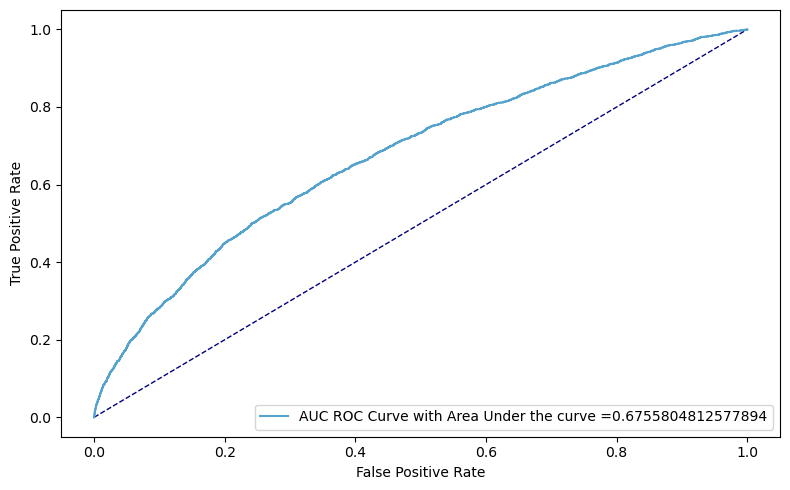

In [21]:
report_and_matrix(forest_baseline, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(forest_baseline,X_test, y_test)

#### XGBOOST classifier

In [22]:
xg_baseline = XGBClassifier(eval_metric='mlogloss')
xg_baseline.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

,TRAIN,TEST
ACCURACY,0.896026,0.883380
PERCISION,0.941035,0.503356
RECALL,0.086928,0.032355
F1,0.159153,0.060803


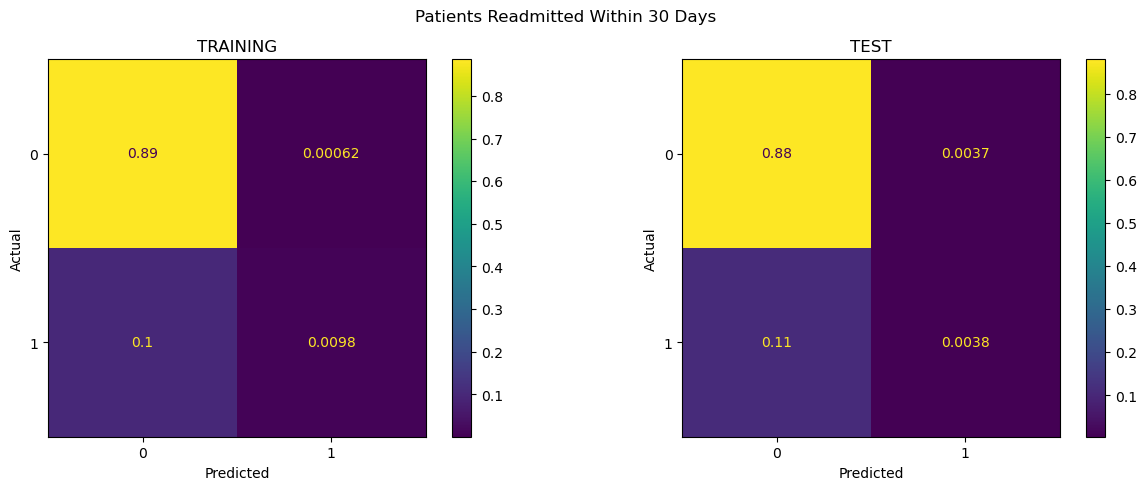

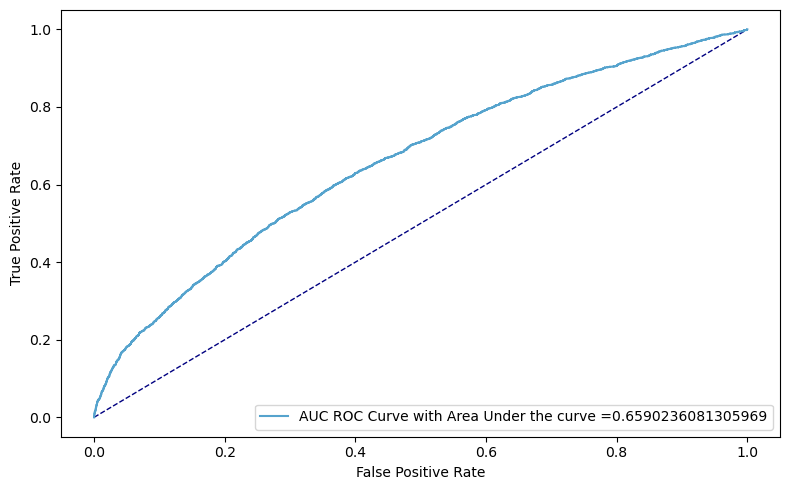

In [23]:
report_and_matrix(xg_baseline, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(xg_baseline,X_test, y_test)

#### Observation
___
    - Based on basline models performance the decision is to use all the models except KNN as it was the only one model that did not performed well.

___

## Using Undersampling to balance the data

In [24]:
from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted==0]
readmitted = X[X.readmitted==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False, 
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

y_train = downsampled.readmitted
X_train = downsampled.drop('readmitted', axis=1)

## Standard Scalling

In [25]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### MODELING
___

#### Logistic Regression with Hyperparameter tuning

In [26]:
# After scaling and Downsampling

log_scaled = LogisticRegression(solver='liblinear')
log_scaled.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

,TRAIN,TEST
ACCURACY,0.618553,0.678428
PERCISION,0.642181,0.192290
RECALL,0.535460,0.548749
F1,0.583985,0.284787


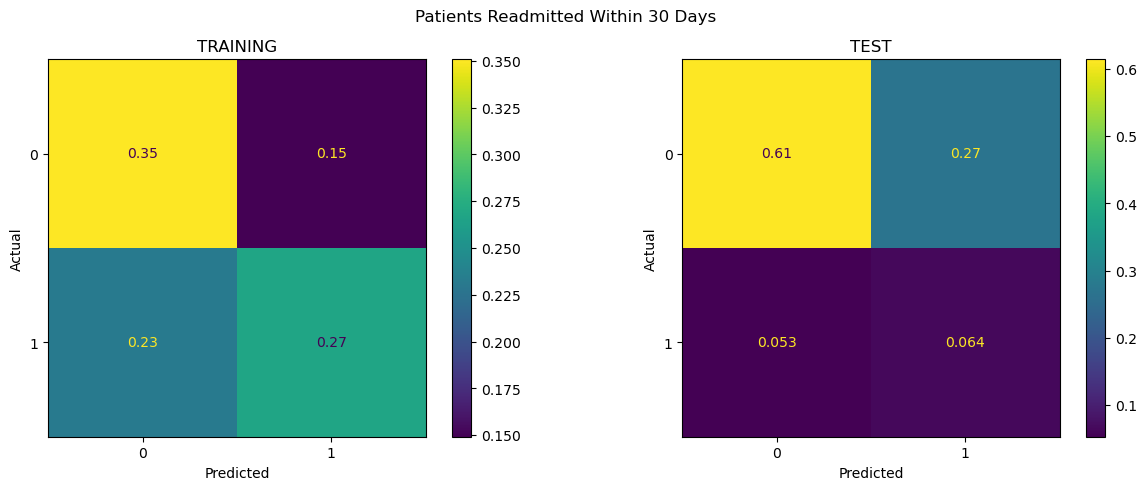

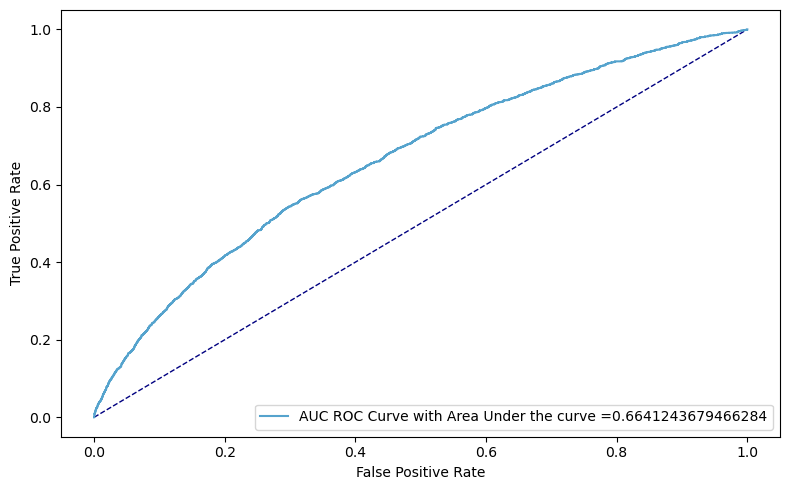

In [27]:
report_and_matrix(log_scaled, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(log_scaled, X_test, y_test)

In [28]:
log_estimator = LogisticRegression(n_jobs=-1)

solvers = ['liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)

grid_search = GridSearchCV(estimator=log_estimator, param_grid=grid, n_jobs=-1, cv=3, scoring=scoring, error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.532571 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


,TRAIN,TEST
ACCURACY,0.617219,0.677320
PERCISION,0.640581,0.191374
RECALL,0.534126,0.547455
F1,0.582530,0.283607


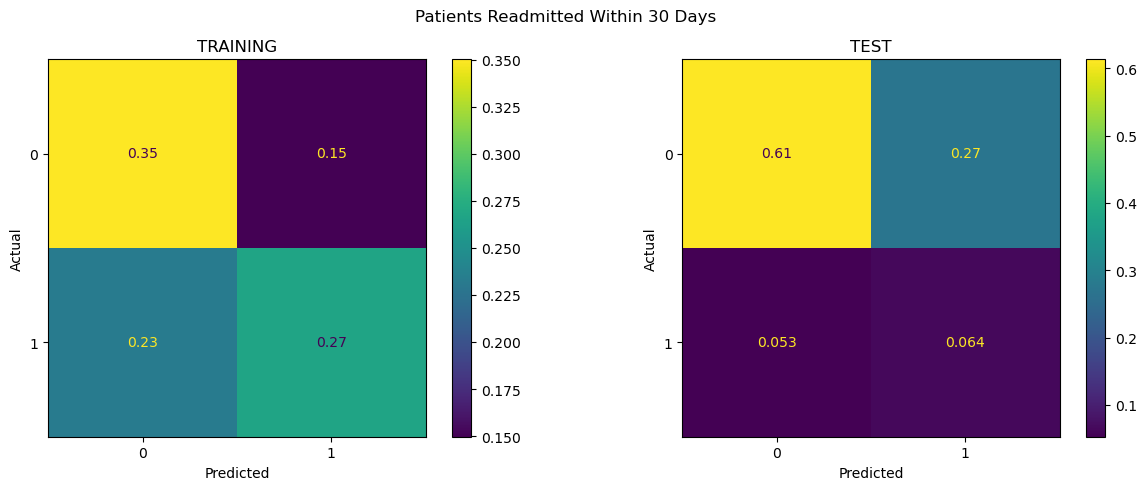

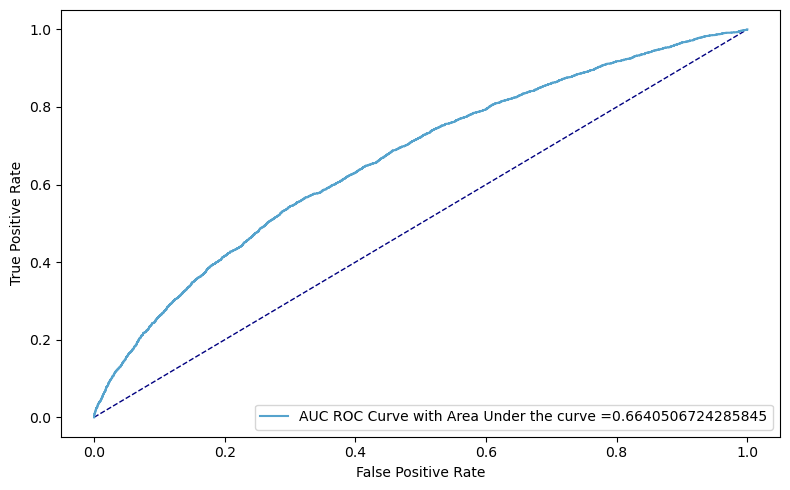

In [29]:
log = LogisticRegression(n_jobs=-1, **grid_result.best_params_)
log.fit(X_train, y_train)

report_and_matrix(log, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(log, X_test, y_test)

### Decision Tree Classifier

,TRAIN,TEST
ACCURACY,0.618386,0.667959
PERCISION,0.637455,0.183927
RECALL,0.549022,0.537101
F1,0.589943,0.274018


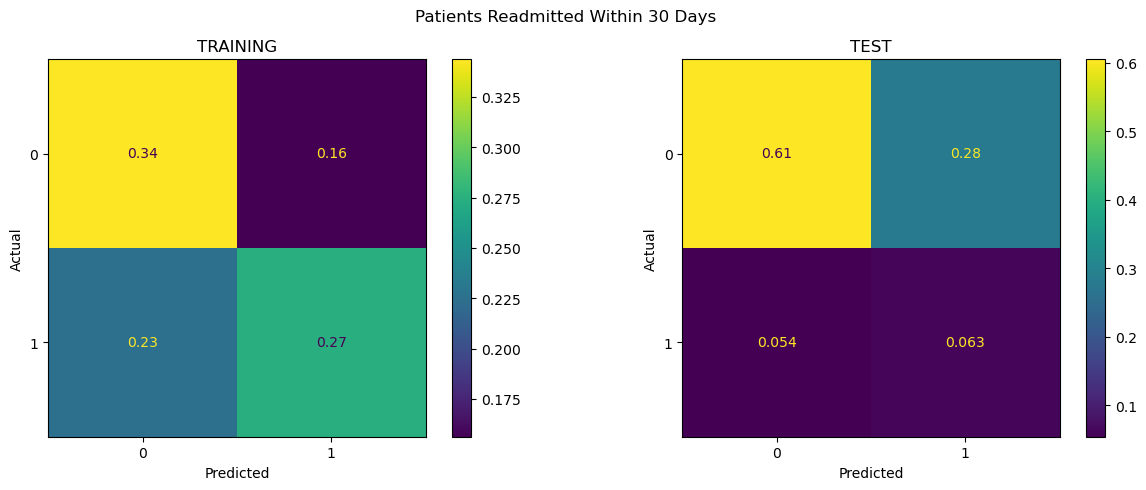

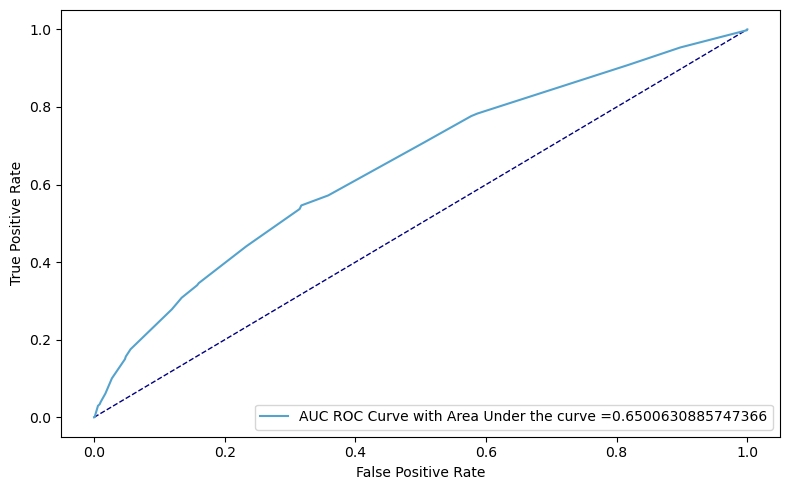

In [30]:
dtc_scaled = DecisionTreeClassifier(random_state=45, max_depth=5)

# Fit the model to training data
dtc_scaled.fit(X_train, y_train)

report_and_matrix(dtc_scaled, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(dtc_scaled, X_test, y_test)

In [31]:
start = time.process_time()


DTC_estimator = DecisionTreeClassifier()

criterion = ['gini', 'entropy']
max_depth = [None, 2, 3, 4, 5, 6]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

grid = dict(criterion = criterion, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
                   
grid_search_DTC = GridSearchCV(estimator=DTC_estimator, param_grid=grid, scoring=scoring, n_jobs=-1, cv=3,  error_score=0)

grid_result = grid_search_DTC.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print('------------------------------------------------------------------------------------------------------')
print(time.process_time() - start)

Best: 0.643396 using {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
------------------------------------------------------------------------------------------------------
3.34375


,TRAIN,TEST
ACCURACY,0.600378,0.570918
PERCISION,0.592426,0.163212
RECALL,0.643397,0.648835
F1,0.616860,0.260817


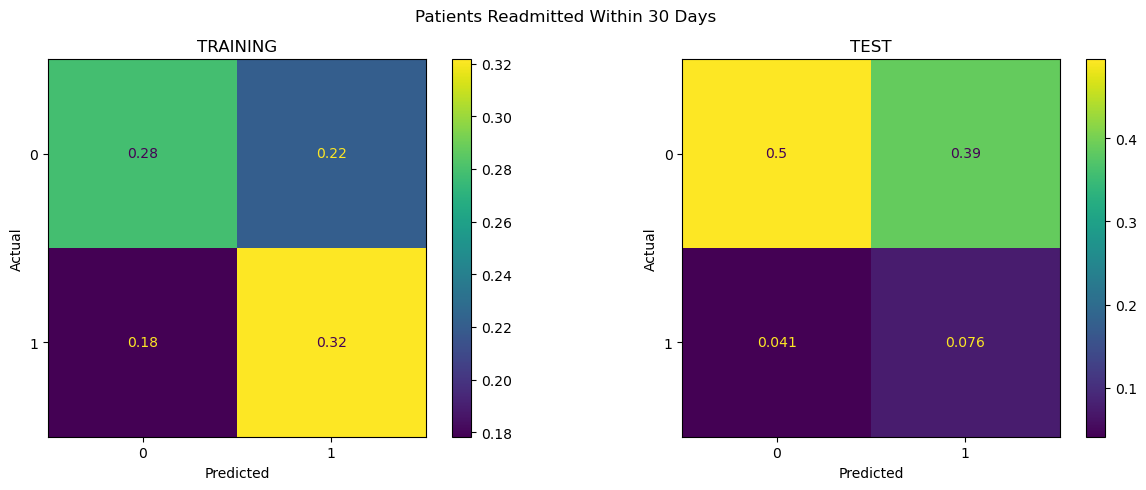

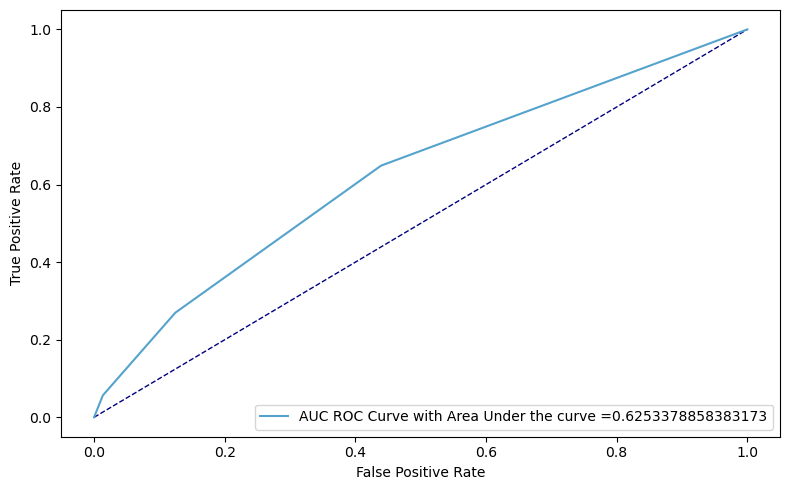

In [32]:
dtc = DecisionTreeClassifier(**grid_result.best_params_)

# Fit the model to training data
dtc.fit(X_train, y_train)

report_and_matrix(dtc, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(dtc, X_test, y_test)

### Random Forest Classifier

,TRAIN,TEST
ACCURACY,0.627501,0.617777
PERCISION,0.626349,0.178528
RECALL,0.632059,0.632010
F1,0.629191,0.278411


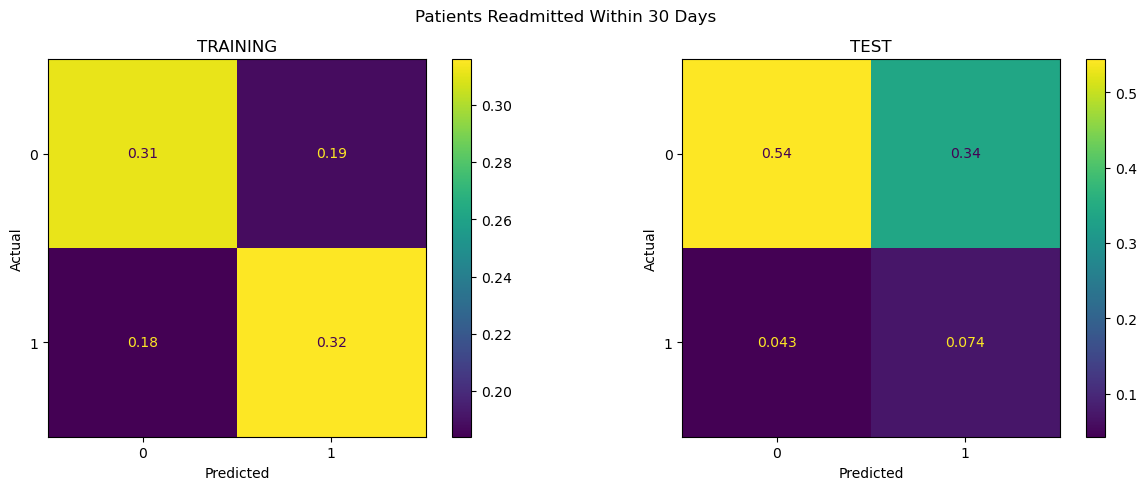

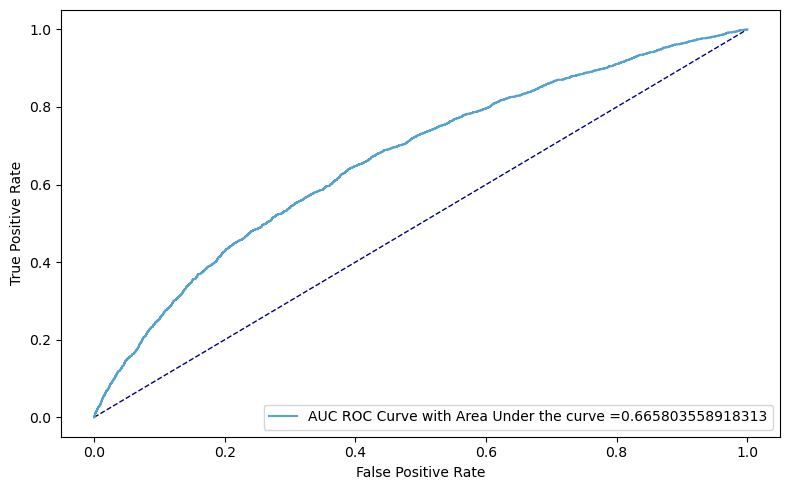

In [33]:
forest_scaled = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest_scaled.fit(X_train, y_train)

report_and_matrix(forest_scaled, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(forest_scaled, X_test, y_test)

In [42]:
start = time.process_time()


RF_estimator = RandomForestClassifier(n_jobs=-1)

criterion = ['gini', 'entropy']
bootstrap = [True, False]
max_depth = [5, 10, 15]
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 2, 4, 6]
min_samples_split = [2, 5, 10]
n_estimators = [200, 400, 600, 800]

grid = dict(criterion = criterion, bootstrap = bootstrap, max_depth = max_depth, max_features = max_features, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split, n_estimators = n_estimators)
                   
grid_search_RM = GridSearchCV(estimator=RF_estimator, param_grid=grid, scoring=scoring, n_jobs=-1, cv=3,  error_score=0)


grid_result = grid_search_RM.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print('------------------------------------------------------------------------------------------------------')
print(time.process_time() - start)

Best: 0.624278 using {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 400}
------------------------------------------------------------------------------------------------------
35.9375


In [35]:
criterion = ['gini', 'entropy']
bootstrap = [True, False]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 2, 4, 6]
min_samples_split = [2, 5, 10]
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

,TRAIN,TEST
ACCURACY,0.676856,0.636602
PERCISION,0.681207,0.184799
RECALL,0.664851,0.619931
F1,0.672930,0.284724


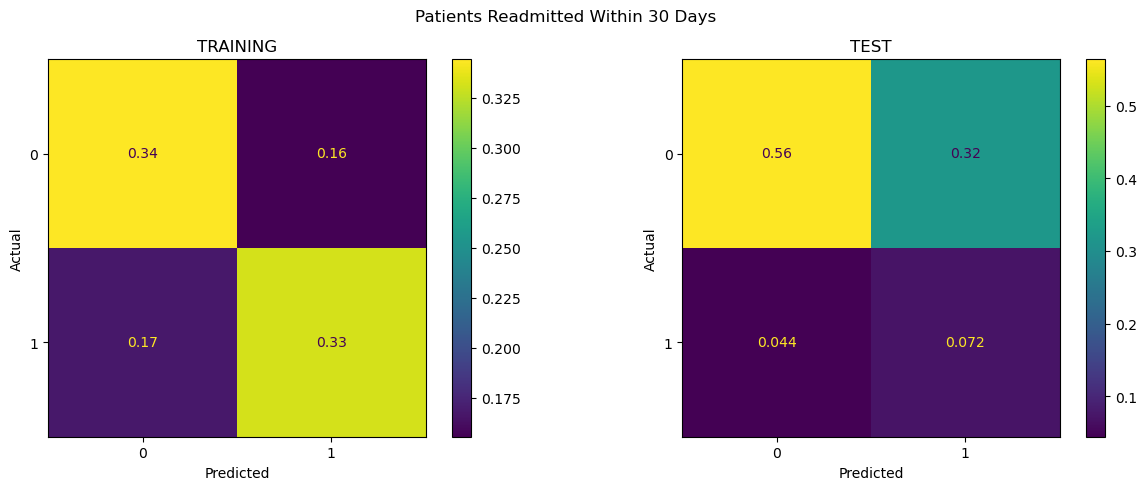

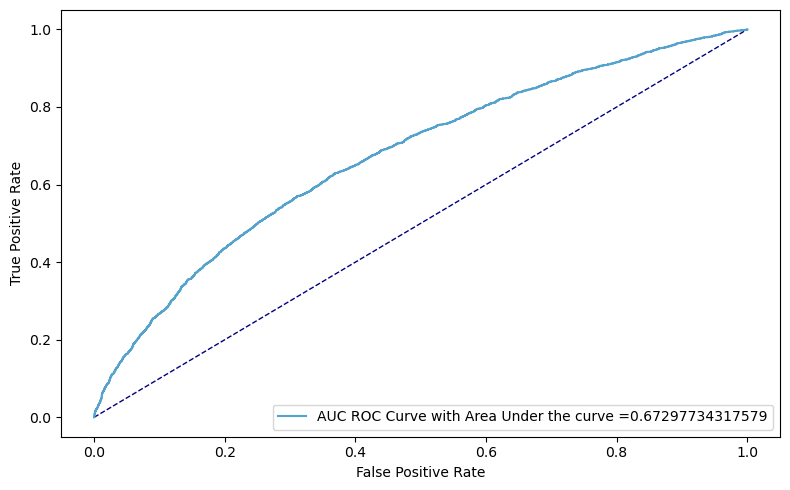

In [43]:
forest = RandomForestClassifier(n_jobs=-1, **grid_result.best_params_)
forest.fit(X_train, y_train)

report_and_matrix(forest, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(forest, X_test, y_test)

#### XGBOOST Classifier

,TRAIN,TEST
ACCURACY,0.797466,0.621049
PERCISION,0.810513,0.173373
RECALL,0.776456,0.596635
F1,0.793119,0.268674


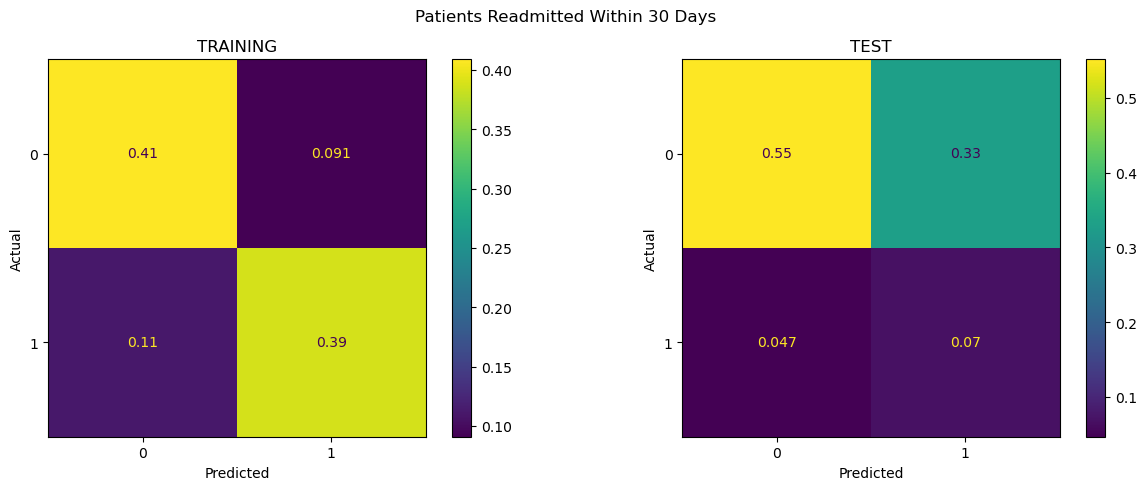

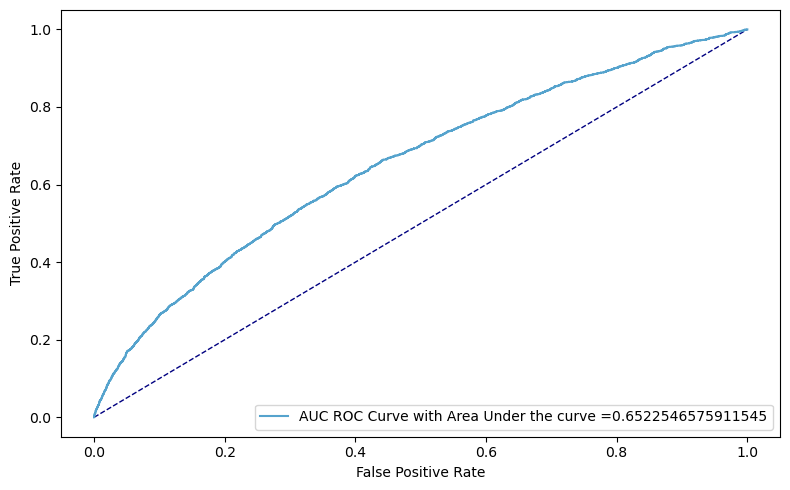

In [37]:
xg_scaled = XGBClassifier(eval_metric='mlogloss')
xg_scaled.fit(X_train, y_train)

report_and_matrix(xg_scaled, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(xg_scaled, X_test, y_test)

#### XGBOOST HYPERPARAMETER TUNING

In [38]:
start = time.process_time()


XG_estimator = XGBClassifier(objective= 'binary:logistic', n_jobs=-1)

max_depth = [10, 20, 30, 40]
n_estimators = [60, 100, 140, 180]
learning_rate = [0.1, 0.01, 0.05]

grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
                   
grid_search_XG = GridSearchCV(estimator=XG_estimator, param_grid=grid, scoring=scoring, n_jobs=-1, cv=3,  error_score=0)


grid_result = grid_search_XG.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print('------------------------------------------------------------------------------------------------------')
print(time.process_time() - start)

[11:05:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.595598 using {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 180}
------------------------------------------------------------------------------------------------------
38.109375


[11:05:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,TRAIN,TEST
ACCURACY,0.863550,0.625679
PERCISION,0.881934,0.176218
RECALL,0.839484,0.600949
F1,0.860186,0.272523


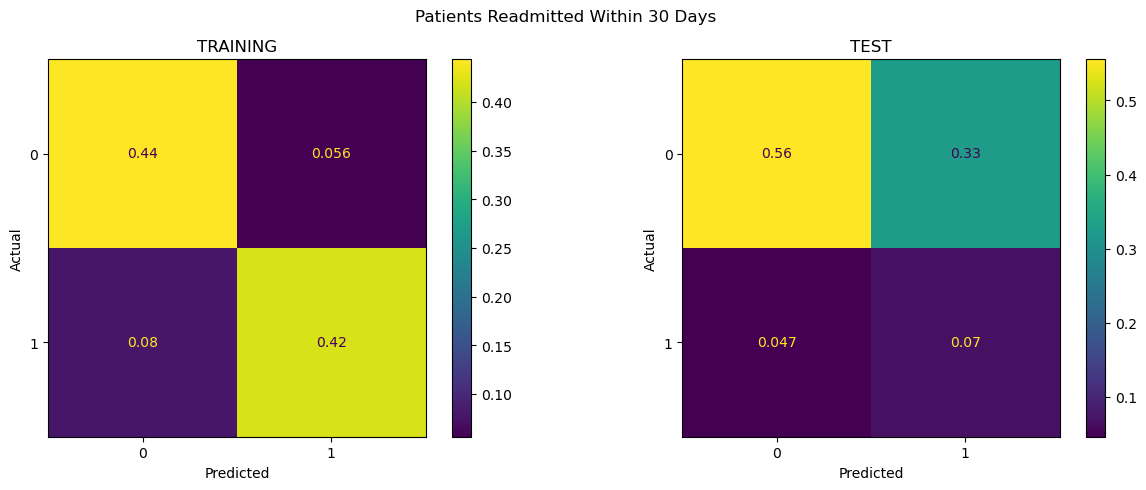

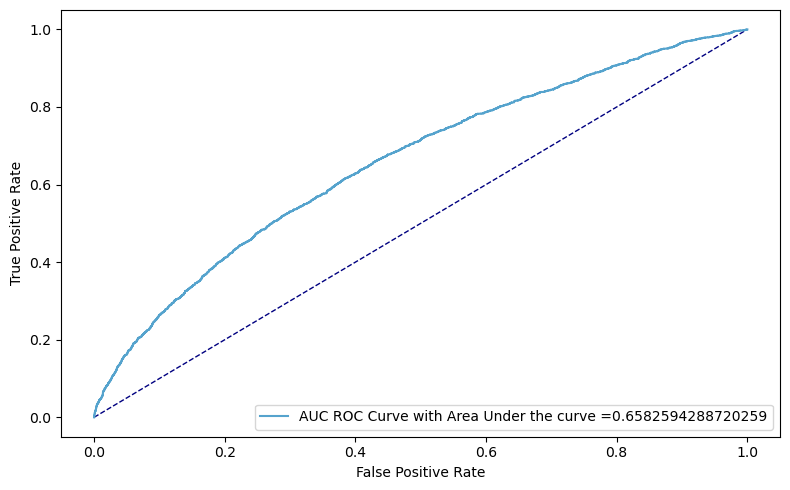

In [39]:
xg = XGBClassifier(objective= 'binary:logistic', n_jobs=-1, **grid_result.best_params_)
xg.fit(X_train, y_train)


report_and_matrix(xg, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(xg, X_test, y_test)

#### THE BEST

,TRAIN,TEST
ACCURACY,0.677412,0.625327
PERCISION,0.678844,0.181615
RECALL,0.673410,0.630716
F1,0.676116,0.282022


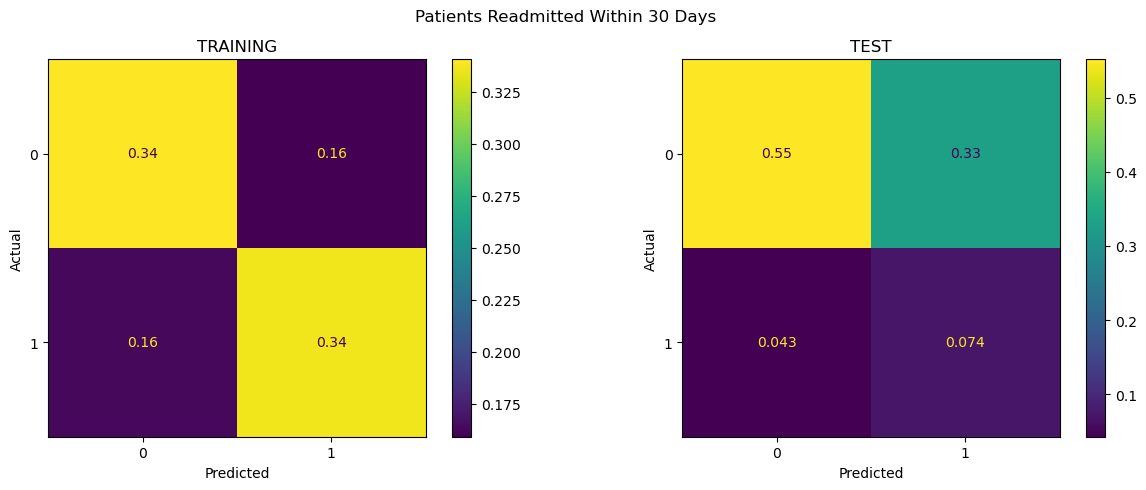

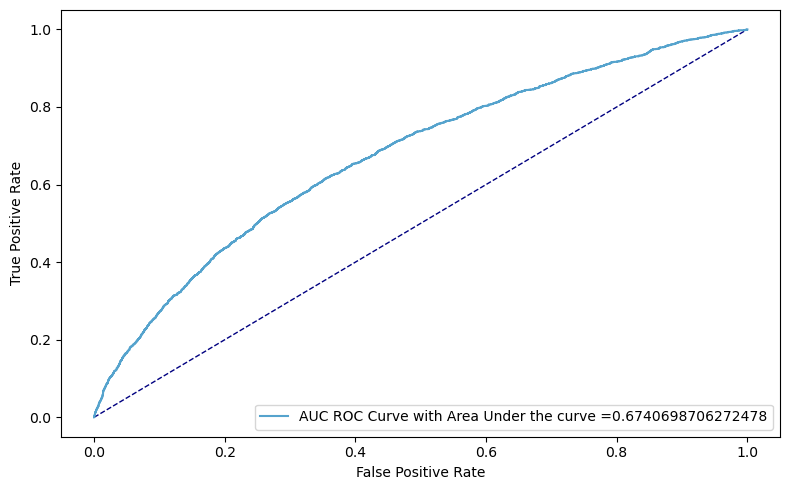

In [44]:
params =  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 400}

forest = RandomForestClassifier(n_jobs=-1, **params)
forest.fit(X_train, y_train)

report_and_matrix(forest, X_train, X_test, y_train, y_test)
generate_auc_roc_curve(forest, X_test, y_test)

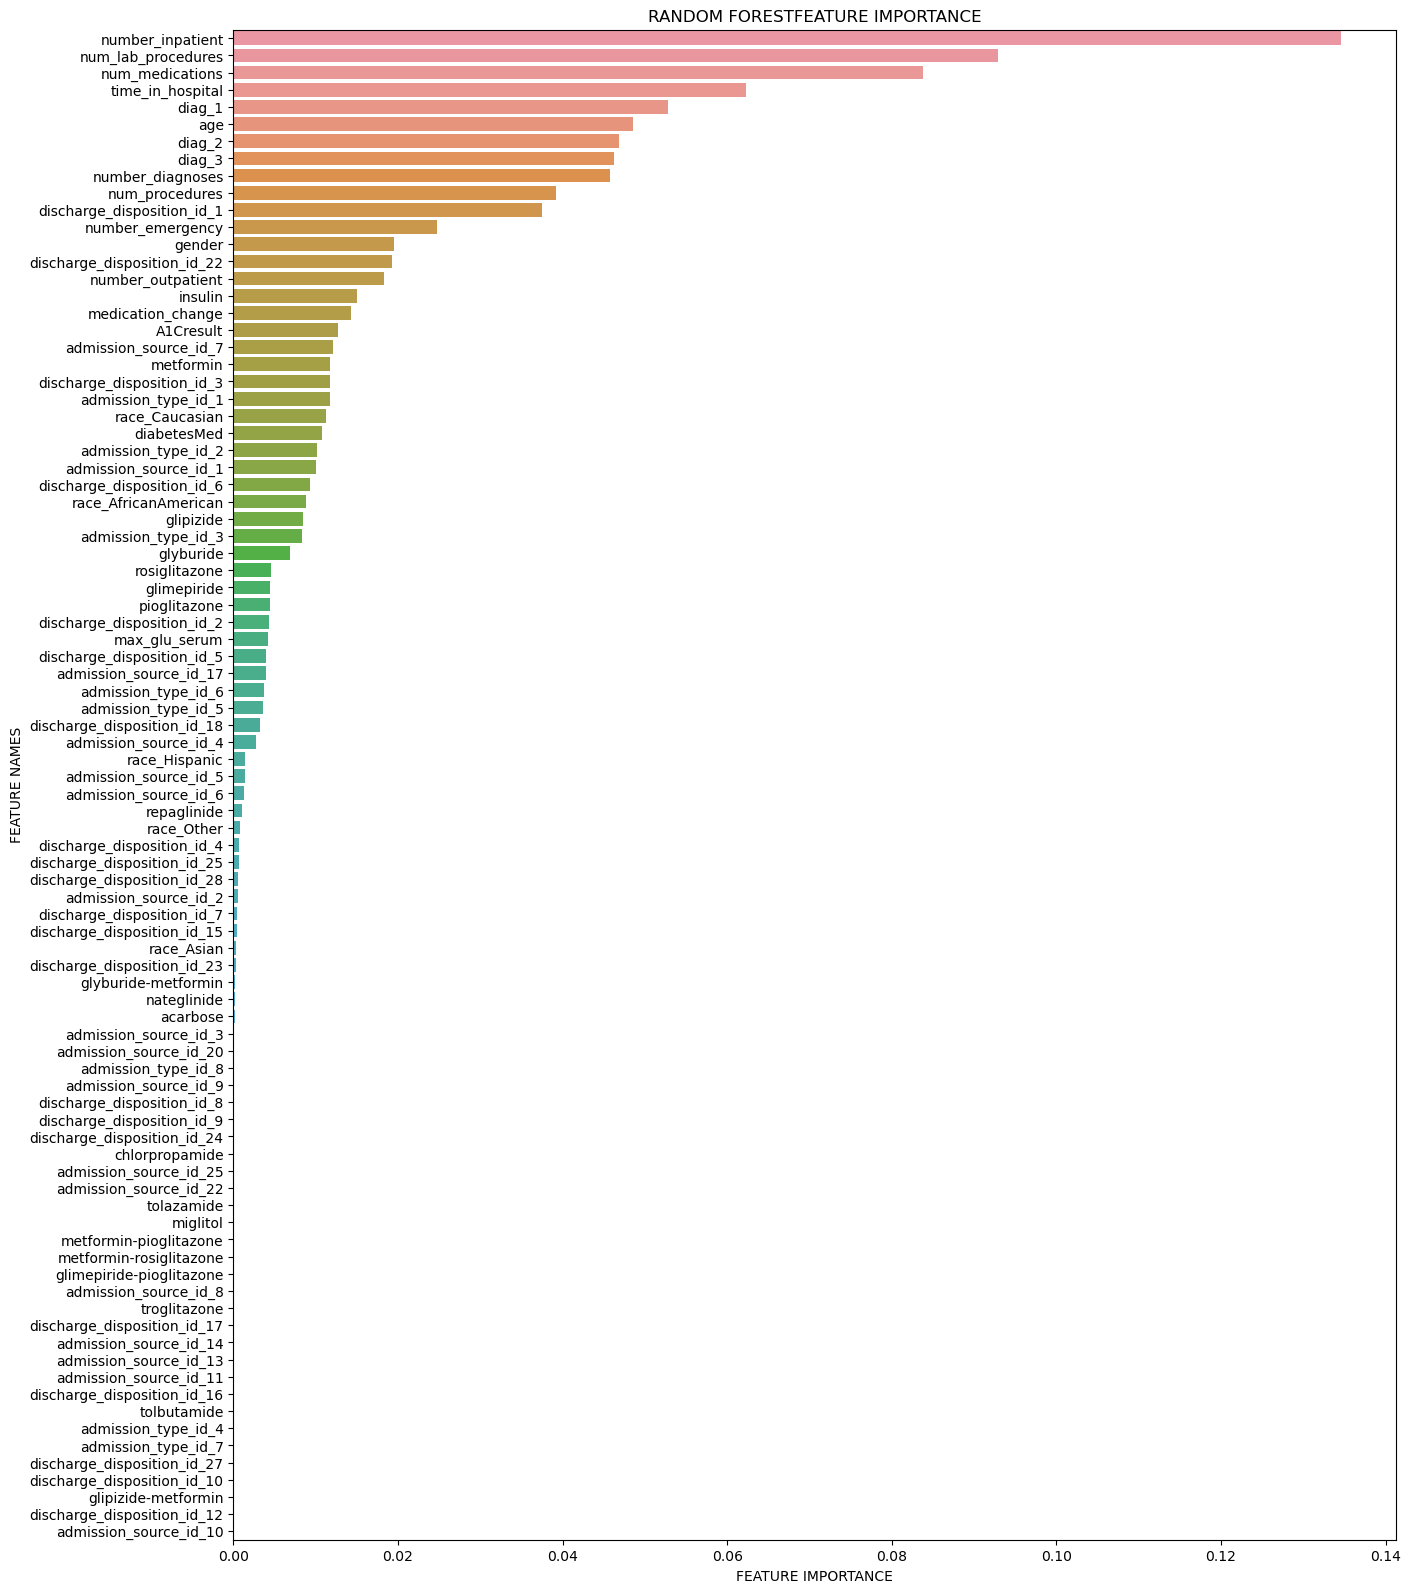

In [41]:
plot_feature_importance(forest.feature_importances_, X_train.columns,'RANDOM FOREST')

### Conclusion on Model and Metric Selection 
---

4 classification models were performed to determine best fit:
Logistic Regression,  Decision Tree, Random Forest, and XGBoost.

The Random Forest Model is reported to be the best model for prediction of the  Readmission of the patient with given medical information with an emphasis Recall in an effort to minimize false predictions of no readmittance.

RECALL : 63.00%

ACCURACY : 62.25%

AUC : 67.40%


##### As Hospital wants to decrease the rate of Patients Readmission the Important metric to be consider is RECALL.

### WHY RECALL...

#### Beacuse readmission will increase the cost to the hospitals and if the algorithm/model predicts that the patients won't be admitted again within 30 days and if the patients gets admitted within 30 days it will cost hospitals so we need to reduce the false neagtive indications. 